In [79]:
# import csv
import numpy as np
from numpy.linalg import inv
import math

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

time: 10.4 ms


In [2]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

/Users/Amiros/anaconda/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed autotime.py. To use it, type:
  %load_ext autotime


In [32]:
def fit(x_train, y_train, lmda):    
    """ Fit Ridge Regression.

    This function  takes 3 inputs. `x_train`, `y_train`, and `lmda`. 

    Parameters
    ----------
    x_train : numpy-array
        a dataset represented as a numpy-array.
    y_train : numpy-array
        a dataset represented as a numpy-array.
    lmda  : int

    Returns
    -------
    numpy-array
    Wrr: weigth vector for Ridge Regression.
    """

    a = x_train.T.dot(x_train) + lmda*np.eye(x_train.shape[1])
    b = x_train.T.dot(y_train)
    Wrr = np.linalg.inv(a).dot(b)
    return Wrr


def predict(X_test, Wrr):

    Y_predict = X_test.dot(Wrr)
    return Y_predict

time: 8.29 ms


In [4]:
#load train data as numpy array
X_train = np.genfromtxt('/Users/Amiros/Dropbox/University/4- Spring 2017/ML/homework/hw1-data/X_train.csv',delimiter=',')
Y_train = np.genfromtxt('/Users/Amiros/Dropbox/University/4- Spring 2017/ML/homework/hw1-data/Y_train.csv',delimiter=',')
# X_train = np.delete(X_train,-1,1)

#load test data as numpy array
X_test = np.genfromtxt('/Users/Amiros/Dropbox/University/4- Spring 2017/ML/homework/hw1-data/X_test.csv',delimiter=',')
Y_test = np.genfromtxt('/Users/Amiros/Dropbox/University/4- Spring 2017/ML/homework/hw1-data/Y_test.csv',delimiter=',')
# X_test = np.delete(X_test,-1,1)

time: 15.2 ms


# Part A

In [5]:
# 1-A
lmda_1A = np.arange(5001)
w_1A = []

#fitting RR on X_train
for i in lmda_1A:
    w_1A.append(fit(X_train, Y_train, i))
w_1A = np.array(w_1A)

#SVD of X_train
U, s, V = np.linalg.svd(X_train, full_matrices= 0)

#Calculating df(lmda)
df_1A = []
for i in lmda_1A:
    a = sum((s**2/(i + s**2)))
    df_1A.append(a)
#     df.reverse
df_1A = np.array(df_1A)

time: 367 ms


In [6]:
w_1A.shape, X_test.shape



((5001, 7), (42, 7))

time: 6.51 ms


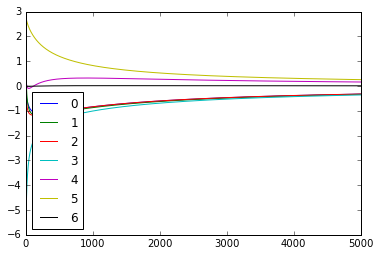

time: 736 ms


In [7]:
w_df_1A = pd.DataFrame(w_1A)
w_df_1A.plot()

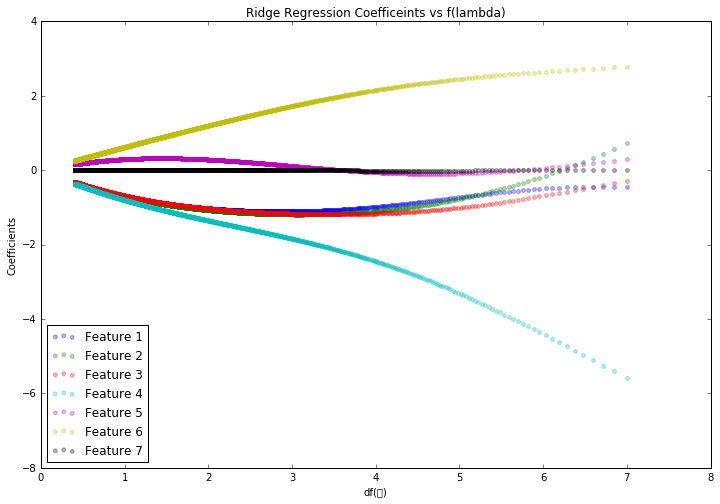

time: 1.02 s


In [55]:
plt.figure(figsize=(12,8))

color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
feature = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']
for i in range(w_1A.shape[1]):
    plt.scatter(df_1A, w_1A[:,i],
            marker='o',
            color=color[i],
            alpha=0.3,
            s = 15,
            label=feature[i])
    
# Chart title
plt.title('Ridge Regression Coefficeints vs f(lambda)')

# y label
plt.ylabel('Coefficients')

# x label
plt.xlabel('df(λ)')

# and a legend
plt.legend(loc='lower left')

## 1-b ??

## 1-c

In [88]:
lmda_1C = np.arange(51)
Y_predict = []

#predict Y
for i in lmda_1C:
    a = fit(X_train, Y_train, i)
    Y_predict.append(predict(X_test,a))
Y_predict = np.array(Y_predict)

time: 9.82 ms


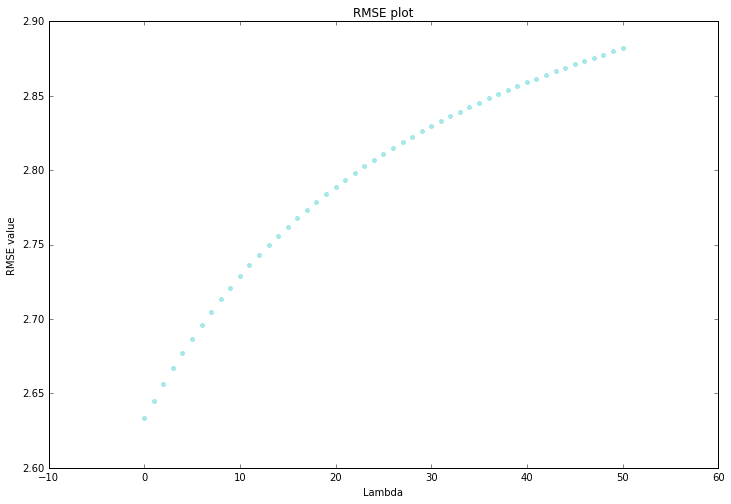

time: 403 ms


In [97]:
rmse = []

for i in lmda_1C:
    a = math.sqrt(np.sum((Y_predict[i] - Y_test)**2) / 42)
    rmse.append(a)
    
plt.figure(figsize=(12,8))

plt.scatter(lmda_1C, rmse,
            marker='o',
            color='c',
            alpha=0.3,
            s = 15)

    
# Chart title
plt.title('RMSE plot')

# y label
plt.ylabel('RMSE value')

# x label
plt.xlabel('Lambda')

# Part 2